In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# data = pd.DataFrame({'text': ['This is the first document.',
#                               'This document is the second document.',
#                               'And this is the third one.',
#                               'Is this the first document?']})
data = pd.read_csv('flask/pkls/transcripts_clean.csv')
data.head(1)




,Unnamed: 0,number,title,clean_transcript
0,0,01x01,Simpsons Roasting on an Open f*re,ooh careful homer theres no time to be careful...


In [18]:
from collections import defaultdict

doc_freq = defaultdict(int)
for doc in data['clean_transcript']:
    terms = set(re.findall(r'\b\w+\b', doc.lower()))
    for term in terms:
        doc_freq[term] += 1

total_docs = len(data['clean_transcript'])

doc_freq_percent = {term: (freq/total_docs) for term, freq in doc_freq.items()}

sorted_result = {term: freq for term, freq in sorted(doc_freq_percent.items(), key=lambda item: item[1], reverse=True)}

print(len(sorted_result))
i=0
for term, frequency in sorted_result.items():
    if i>890:
        break
    print(f'{i}: {term}, {frequency:.2%}')
    i=i+1

45706
0: and, 99.83%
1: we, 99.83%
2: thats, 99.83%
3: but, 99.83%
4: be, 99.83%
5: are, 99.83%
6: have, 99.83%
7: with, 99.83%
8: here, 99.83%
9: no, 99.83%
10: now, 99.83%
11: know, 99.83%
12: not, 99.83%
13: at, 99.83%
14: that, 99.83%
15: all, 99.83%
16: a, 99.83%
17: its, 99.83%
18: do, 99.83%
19: one, 99.83%
20: just, 99.83%
21: in, 99.83%
22: is, 99.83%
23: on, 99.83%
24: what, 99.83%
25: the, 99.83%
26: my, 99.83%
27: me, 99.83%
28: of, 99.83%
29: oh, 99.83%
30: your, 99.83%
31: like, 99.83%
32: was, 99.83%
33: for, 99.83%
34: to, 99.83%
35: you, 99.83%
36: dont, 99.83%
37: were, 99.83%
38: well, 99.83%
39: this, 99.83%
40: im, 99.83%
41: i, 99.83%
42: so, 99.83%
43: get, 99.83%
44: it, 99.83%
45: up, 99.65%
46: out, 99.65%
47: if, 99.65%
48: can, 99.48%
49: got, 99.48%
50: youre, 99.48%
51: how, 99.48%
52: ill, 99.48%
53: see, 99.48%
54: go, 99.30%
55: right, 99.30%
56: about, 99.13%
57: why, 98.96%
58: back, 98.78%
59: hey, 98.78%
60: our, 98.78%
61: want, 98.61%
62: think, 9

In [3]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(strip_accents='ascii',max_df=0.2,min_df=1,sublinear_tf=True,ngram_range=(1,1),norm='l2')

# Fit the vectorizer to the raw text data
tfidf_vectorizer.fit(data['clean_transcript'])

# Transform the raw text into TF-IDF features
tfidf_features = tfidf_vectorizer.transform(data['clean_transcript'])

# Create a DataFrame to store the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)
#Confirmed the weird words are actually part of the corpus via ctrl-f on the transcripts_clean.csv

     000  0000  000000  00000000  0001  000to1  001  003  007  00am  ...  \
0    0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
1    0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
2    0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
3    0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
4    0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
..   ...   ...     ...       ...   ...     ...  ...  ...  ...   ...  ...   
570  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
571  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
572  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
573  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   
574  0.0   0.0     0.0       0.0   0.0     0.0  0.0  0.0  0.0   0.0  ...   

     zutroy  zuylen  zwei  zweig  zwieback  zydeco   zz  zz99  zzyzwiski  \
0       0.0

In [4]:
#set params for the clustering
max_clusters = 10
min_clusters=4
best_clusters = 0

In [5]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Determine optimal number of clusters using silhouette coefficient
best_score = -1
scoreList = {}
bestRandomSeed = -1
count_dict = {}
def increment_count(key):
    if key in count_dict:
        count_dict[key] += 1
    else:
        count_dict[key] = 1

for randomSeed in range(0,1):#ran 50 to test
    bestSeedScore=-1
    bestCluster=-1
    for n_clusters in range(min_clusters, max_clusters+1):
        # Create a KMeans model with the current number of clusters
        kmeans = KMeans(n_clusters=n_clusters, random_state=randomSeed)
        
        # Fit the KMeans model to the TF-IDF features
        kmeans.fit(tfidf_features)
        
        # Predict the cluster labels for the TF-IDF features
        labels = kmeans.labels_
        
        # Calculate the silhouette score for the clustering result
        score = silhouette_score(tfidf_features, labels)
        scoreList[n_clusters]=score
        # Update the best score and number of clusters if necessary
        if score > bestSeedScore:
            bestSeedScore=score
            bestCluster=n_clusters
        if score > best_score:
            bestRandomSeed = randomSeed
            best_score = score
            best_clusters = n_clusters
    increment_count(bestCluster)
        

# Print the optimal number of clusters
print("Optimal number of clusters:", best_clusters)

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_clusters, random_state=bestRandomSeed)
kmeans.fit(tfidf_features)

# Get the cluster labels for each document
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['cluster'] = cluster_labels

# Display the resulting DataFrame
print(data)
print(scoreList)

/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

Optimal number of clusters: 4


/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     Unnamed: 0 number                              title  \
0             0  01x01  Simpsons Roasting on an Open f*re   
1             1  01x02                    Bart the Genius   
2             2  01x03                    Homer's Odyssey   
3             3  01x04      There's No Disgrace Like Home   
4             4  01x05                   Bart the General   
..          ...    ...                                ...   
570         570  26x18                        Peeping Mom   
571         571  26x19             The Kids Are All Fight   
572         572  26x20                Let's Go Fly a Coot   
573         573  26x21                             Bull-E   
574         574  26x22                    Mathlete's Feat   

                                      clean_transcript  cluster  
0    ooh careful homer theres no time to be careful...        0  
1    come on mom yeah mom hurry up all right mmm ho...        1  
2    chattering mrs now class i dont want this fiel...        1  
3  

In [8]:
print("best clusters")
print(best_clusters)
print("best random seed")
print(bestRandomSeed)
print("score")
print(best_score)

best clusters
4
best random seed
1
score
0.00021592568621793038


In [7]:
print(count_dict)

{5: 9, 4: 31, 6: 2, 8: 3, 9: 1, 7: 3, 10: 1}


In [9]:

# Get the cluster labels
labels = kmeans.labels_

# Count the number of samples per cluster
unique_labels, counts = np.unique(labels, return_counts=True)

# Print the count of samples per cluster
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Cluster 0: 288 samples
Cluster 1: 72 samples
Cluster 2: 84 samples
Cluster 3: 131 samples


In [10]:
data['season'] = data['number'].str.extract(r'^(.*?)x', expand=False)


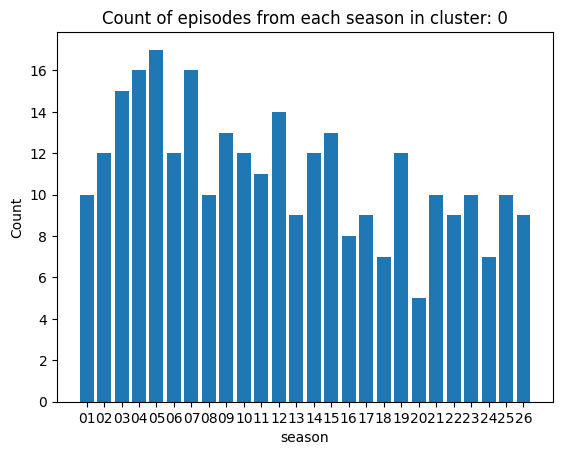

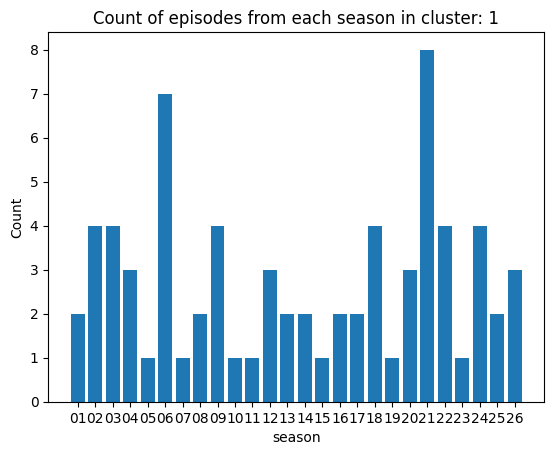

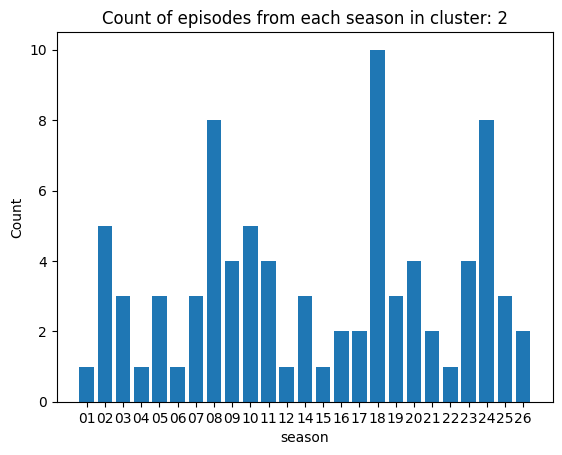

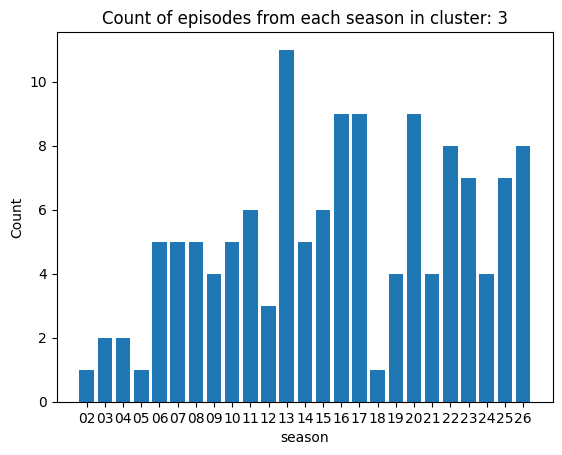

In [11]:
import matplotlib.pyplot as plt


value_counts_holder = data['season'].value_counts().sort_index()


for i in range(0,4):
    df_copy = data[data['cluster']==i]
    value_counts = df_copy['season'].value_counts().sort_index()
    #Plot the bar chart
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel('season')
    plt.ylabel('Count')
    plt.title('Count of episodes from each season in cluster: ' + str(i))
    plt.show()


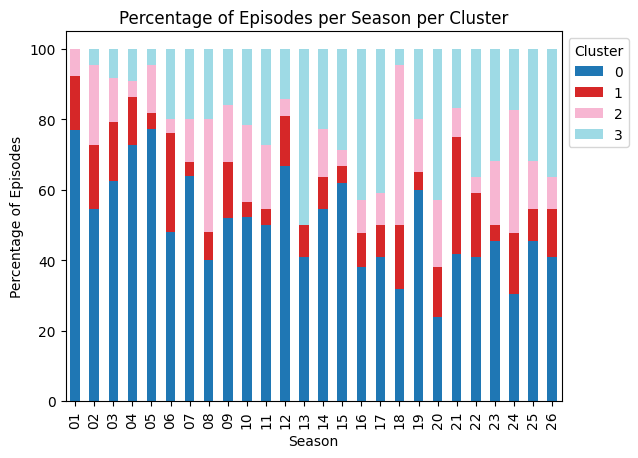

In [12]:
# Group by 'cluster' and 'season' and calculate the count of episodes in each group
grouped_df = data.groupby(['cluster', 'season']).size().reset_index(name='count of episodes')

# Calculate the total count of episodes in each season
season_total = grouped_df.groupby('season')['count of episodes'].sum()

# Calculate the percentage of episodes contributed by each cluster within each season
grouped_df['percent_episodes'] = grouped_df.apply(
    lambda row: (row['count of episodes'] / season_total[row['season']]) * 100, axis=1
)

# Pivot the DataFrame to have clusters as columns and seasons as rows
pivot_df = grouped_df.pivot(index='season', columns='cluster', values='percent_episodes').fillna(0)

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('Season')
plt.ylabel('Percentage of Episodes')
plt.title('Percentage of Episodes per Season per Cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [14]:
tfidf_df['cluster'] = data['cluster']

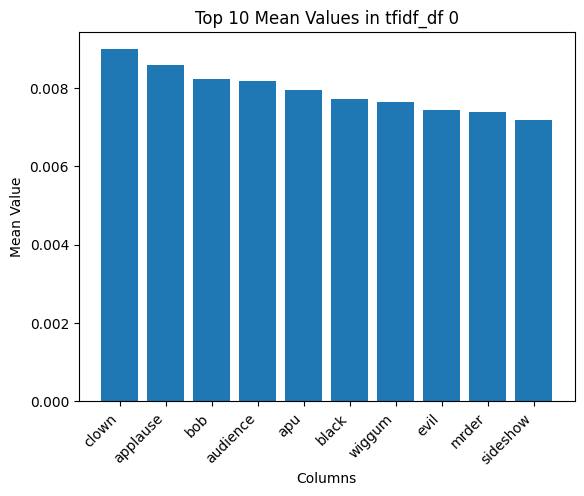

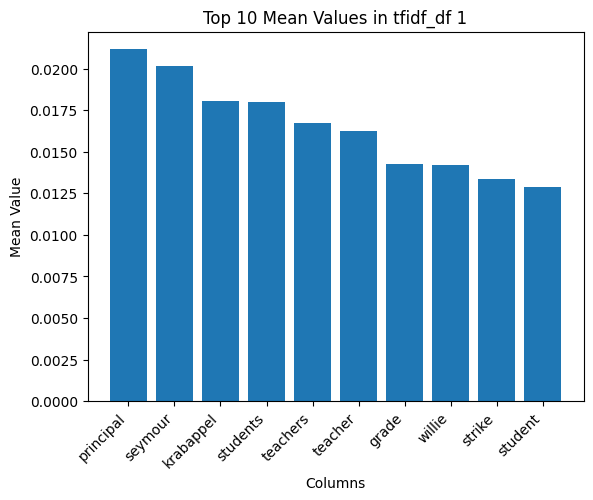

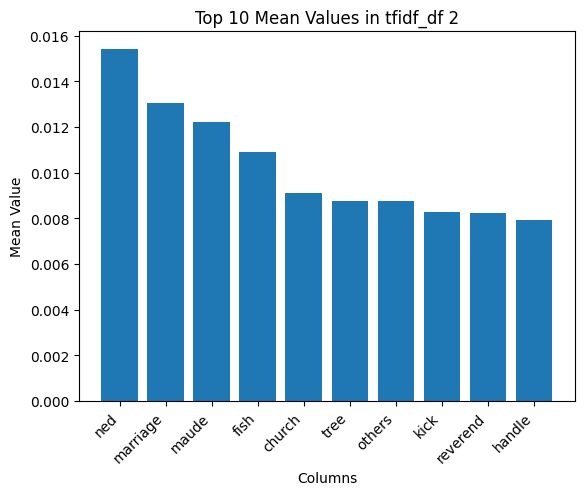

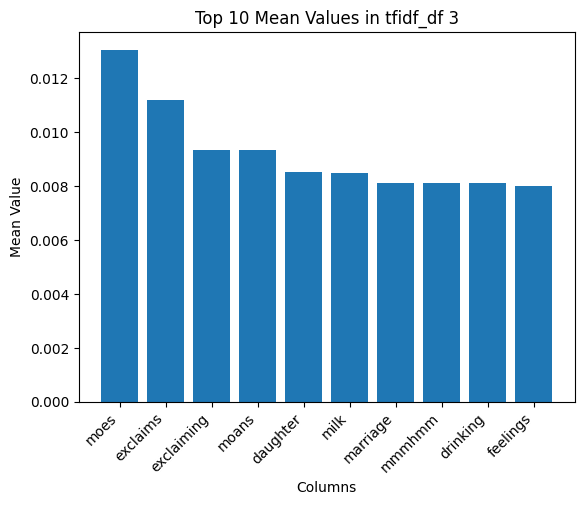

In [15]:
for i in range(0,4):
    tfidf_df_holder = tfidf_df[tfidf_df['cluster']==i].drop('cluster',axis=1)
    mean_values = tfidf_df_holder.mean()

    # Sort the mean values in descending order
    sorted_mean_values = mean_values.sort_values(ascending=False)

    # Select the top 10 mean values
    top_10_mean_values = sorted_mean_values.head(10)

    # Plot the top 10 mean values
    plt.bar(top_10_mean_values.index, top_10_mean_values.values)
    plt.xlabel('Columns')
    plt.ylabel('Mean Value')
    plt.title('Top 10 Mean Values in tfidf_df '+str(i))
    plt.xticks(rotation=45, ha='right')
    plt.show()

# COMMENT OUT THE KMEANS SSE RUN TO RERUN AND HAVE THE CORRECT CLUSTERING

In [222]:

import matplotlib.pyplot as plt
# Perform K-means clustering with varying number of clusters

sse = []  # List to store the sum of squared errors

for n_clusters in range(min_clusters, max_clusters+1):
    # Create a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the KMeans model to the TF-IDF features
    kmeans.fit(tfidf_features)
    
    # Append the sum of squared errors to the list
    sse.append(kmeans.inertia_)


/Users/josieber2201/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


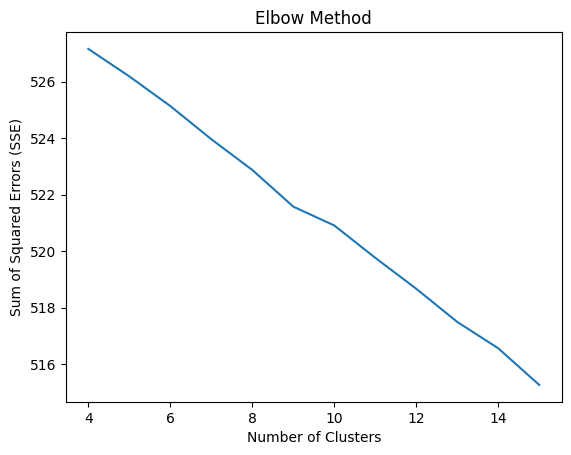

In [223]:
# Plot the SSE values against the number of clusters
plt.plot(range(min_clusters, max_clusters+1), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

In [230]:
experimentalText =  pd.DataFrame({'text': ['This is the first document, what is it recognizing bart marge hammer duck confit ?']})

In [231]:
experimental_features = tfidf_vectorizer.transform(experimentalText['text'])
experimental_idf = pd.DataFrame(experimental_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [232]:
kmeans.transform(experimental_features)

array([[0.29755437, 0.28967018, 0.28523187, 0.28264253]])

In [233]:
import re
#preprocess input document
document = "This is the first document"
pattern2 = r"[^\w\s]"
document_processed = " ".join(document.strip().lower().replace('\n', ' ').split())
document_processed = re.sub(pattern2, "", document_processed)

In [234]:

# Transform the input document into TF-IDF features
input_tfidf = tfidf_vectorizer.transform([document_processed])

# Predict the cluster label for the input document
predicted_cluster = kmeans.predict(input_tfidf)[0]

print("Predicted Cluster:", predicted_cluster)


Predicted Cluster: 3


In [94]:
tfidf_df['cluster']=cluster_labels

In [95]:
matchingClusters = tfidf_df[tfidf_df['cluster']==predicted_cluster]

In [97]:
matchingClusters

,00 am,00 in,00 pm,10 minutes,10 years,15 minutes,20 minutes,20 years,24 hours,25 years,...,youve ever,youve gotta,youve had,youve heard,youve just,youve made,youve never,youve ruined,youve seen,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.001345,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.001243,0.000000,0.0,0.001393,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.001015,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.001561,0.0,0.000000,0.0,0.0,0.0,0.0,1
572,0.0,0.0,0.0,0.0,0.0,0.0,0.001660,0.0,0.0,0.0,...,0.0,0.000000,0.001660,0.0,0.000000,0.0,0.0,0.0,0.0,1
573,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity between the input document and the TF-IDF DataFrame
#input data first ,og data next
matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]

/var/folders/hm/7_f2zj854wg_2q1sqshlqw3h0000gp/T/ipykernel_11192/2970010851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]


In [41]:
matchingClusters = matchingClusters.reset_index().rename(columns={'level_0': 'documentNum'})

In [43]:
matchingClusters = matchingClusters.rename(columns={'level_0':'documentNum'})

In [45]:
matchingClusters = matchingClusters.sort_values(by='cosine_similarity', ascending=False)


In [48]:
topTenResults = matchingClusters.head(10)

In [50]:
topTenResults

,documentNum,00,000,0000,000000,00000000,0001,000to1,001,003,...,zz,zz99,zzyzwiski,zzzzzzzzzzzzzzzzzz,ándale,çalm,éclair,êtes,ﬂght,cosine_similarity
100,440,0.003293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026544
122,514,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025407
4,7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024055
10,18,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023853
124,518,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023392
3,6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022934
24,95,0.008617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022910
117,491,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022815
82,342,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022737
41,162,0.006089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022733


In [16]:
import pickle
# Serialize and save the model
with open('flask/pkls/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

with open('flask/pkls/kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

with open('flask/pkls/documents_idf.pkl','wb') as file:
    pickle.dump(tfidf_df,file)

with open('flask/pkls/documents.pkl','wb') as file:
    pickle.dump(data[['number','title']],file)



In [17]:
#Testing application logic

with open('flask/pkls/tfidf_vectorizer.pkl', 'rb') as file:
        tfidf_vectorizer = pickle.load(file)


with open('flask/pkls/kmeans.pkl', 'rb') as file:
         kmeans =  pickle.load(file)
         
with open('flask/pkls/documents.pkl', 'rb') as file:
         documents =  pickle.load(file)
documents = documents.reset_index().rename(columns={'level_0': 'documentNum'})

with open('flask/pkls/documents_idf.pkl', 'rb') as file:
         tfidf_df =  pickle.load(file)


/var/folders/hm/7_f2zj854wg_2q1sqshlqw3h0000gp/T/ipykernel_85410/1838742895.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]


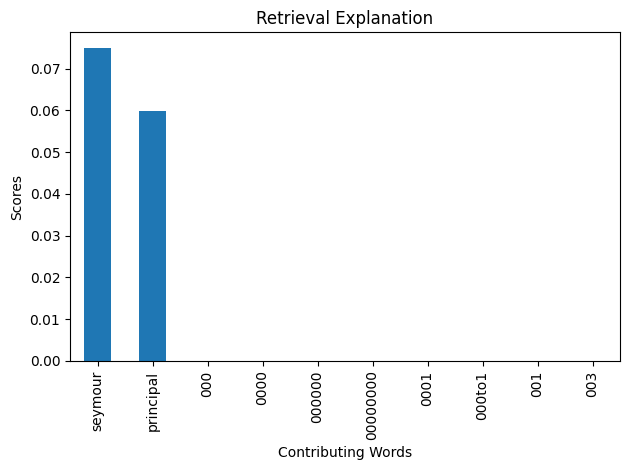

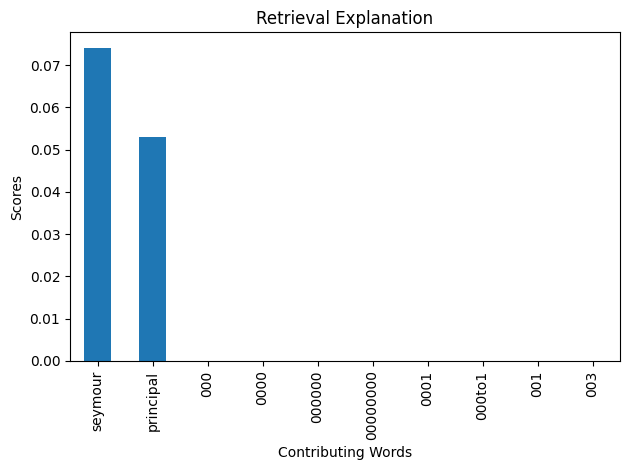

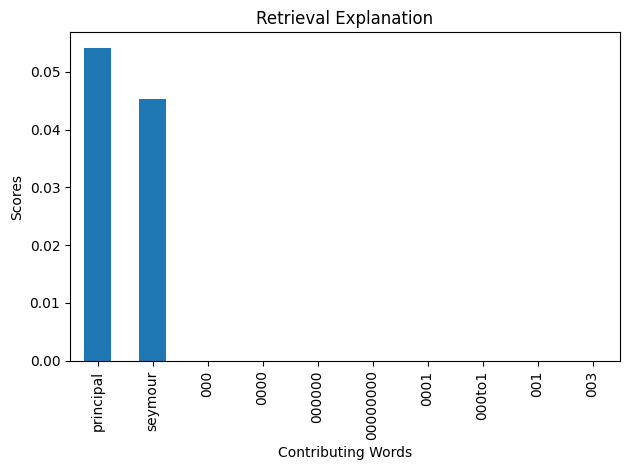

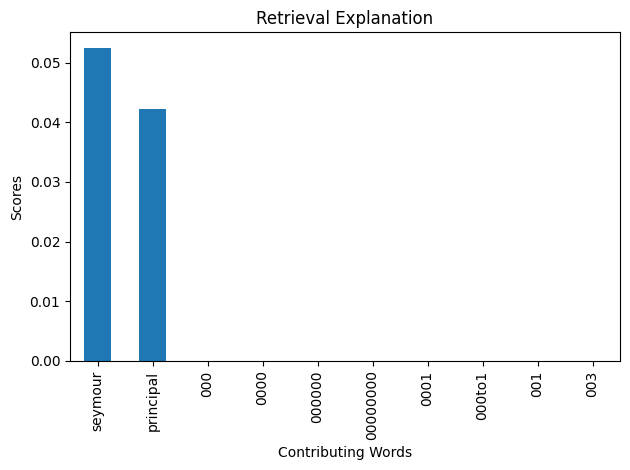

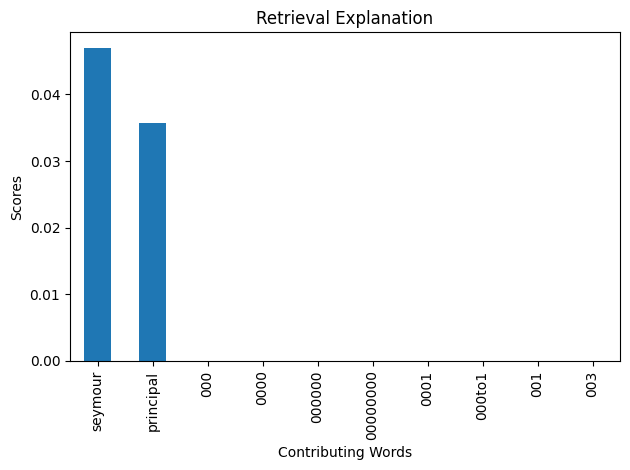

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

import re
document = ' principal seymour krebappel '
pattern2 = r"[^\w\s]"
document_processed = " ".join(document.strip().lower().replace('\n', ' ').split())
document_processed = re.sub(pattern2, "", document_processed)
input_tfidf = tfidf_vectorizer.transform([document_processed])
predicted_cluster = kmeans.predict(input_tfidf)[0]
matchingClusters = tfidf_df[tfidf_df['cluster']==predicted_cluster]
matchingClusters['cosine_similarity'] = cosine_similarity(input_tfidf, matchingClusters)[0]

matchingClusters = matchingClusters.reset_index().rename(columns={'level_0': 'documentNum'})
matchingClusters = matchingClusters.sort_values(by='cosine_similarity', ascending=False)
topTenResults = matchingClusters.head(2)

#topTenResults = topTenResults[['documentNum','cosine_similarity']]
resultsReturner = pd.merge(topTenResults, documents, left_on='documentNum', right_on = 'index', how='inner')
result_rows = []
input_tfidf_df = pd.DataFrame(input_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


    # Iterate over each row in the DataFrame
for index, row in resultsReturner.iterrows():
    resultsReturnerCopy = resultsReturner.copy()
    tempReturner = resultsReturnerCopy.loc[[index]]
    tempReturner.reset_index(drop=True, inplace=True)
    input_tfidf_df.reset_index(drop=True, inplace=True)
    tempReturner = tempReturner*input_tfidf_df

    numeric_columns = tempReturner.select_dtypes(include='number').drop('documentNum',axis=1).drop('index_y',axis=1)
    columns_to_keep = numeric_columns.sum().nlargest(10).index
    

        # Select the top 10 columns and other relevant columns from the DataFrame
    result_df = tempReturner[['title_y', 'number', 'cosine_similarity'] + columns_to_keep.tolist()]
    result_rows.append(result_df)
        # Create a new DataFrame containing only the selected columns and their values
    plot_data = tempReturner[columns_to_keep.tolist()]
    plot_data_transposed = plot_data.T

    # Plot each column on a bar chart
    plot_data_transposed.plot(kind='bar', legend=False)

        # Add labels and title
    plt.xlabel('Contributing Words')
    plt.ylabel('Scores')
    plt.title('Retrieval Explanation')
    plt.tight_layout()
    plt.savefig('plot_image_'+str(index)+'.png')
#resultsJson = resultsReturner.to_json(orient='records')